Converged after 5 iterations.


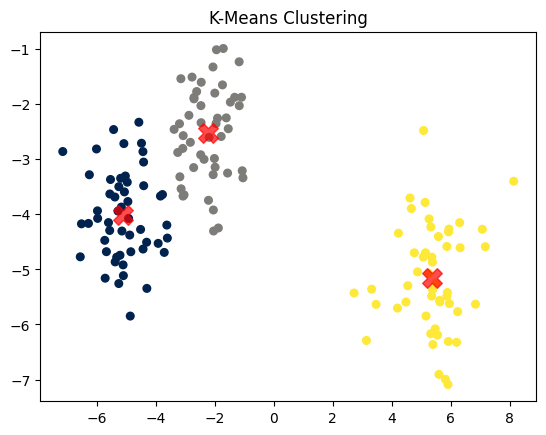

In [73]:

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 16 14:58:48 2025

@author: sevak
"""

import numpy as np
import matplotlib.pyplot as plt




def assign_clusters(X, centroids,k):
    """Assign each data point to the nearest centroid."""
    
     #**************ADD YOUR CODE HERE*******************
    cluster_group = []
    for points in range(X.shape[0]):
        distances = []
                
        for cluster in range(k):
            distances.append(np.sqrt((X[points]-centroids[cluster]) @ (X[points]-centroids[cluster])))
                # print(distances)

        cluster_group.append(distances.index(np.min(distances)))
                
        


    # return an array of labels {0,1,2} corresponding to the 3 cluster ids
    return np.array(cluster_group)


def update_centroids(X, labels, k):
    """Compute new centroids as the mean of points in each cluster."""
    # new_centroids = np.zeros((k, X.shape[1]))
    
    #**************ADD YOUR CODE HERE*******************
    
    cluster_type = np.unique(labels) 
    new_centroids = []
    for type in cluster_type:
        new_centroids.append(X[labels == type].mean(axis=0))

    # return the updated centroids
    return np.array(new_centroids)



def kmeans(X, k=3, max_iters=50, tolerance=1e-4, random_state=0):
    """Main K-means function."""
    
    np.random.seed(random_state)
    
    # Randomly pick K samples from the dataset as the centroids
    indices = np.random.choice(len(X), k, replace=False)
    centroids = X[indices] 
    
    
    
    
    for i in range(max_iters):
        labels = assign_clusters(X, centroids,k)
        new_centroids = update_centroids(X, labels, k)
        
        if np.all(np.abs(new_centroids - centroids) < tolerance):
            print(f"Converged after {i+1} iterations.")
            break
        
        centroids = new_centroids
    
    return labels, centroids


# ************************************
# main function
# ************************************
if __name__ == "__main__":
    # Generate sample data
    from sklearn.datasets import make_blobs
    
    X, _ = make_blobs(n_samples=150, centers=3, cluster_std=0.9, random_state=1836)
    labels = np.zeros(X.shape[0])
    centroids = X[:3]
    
    
    
    # Run K-means
    # ****UNCOMMENT THE BELOW LINE AFTER IMPLEMENTATION OF THE TWO METHODS
    
    labels, centroids = kmeans(X, k=3, random_state=183)

    # Plot results
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=30, cmap='cividis')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.7, marker='X')
    plt.title("K-Means Clustering")
    plt.show()


Converged after 5 iterations.
Converged after 5 iterations.
Converged after 5 iterations.
Converged after 10 iterations.
Converged after 10 iterations.
Converged after 6 iterations.
Converged after 9 iterations.
Converged after 8 iterations.
Converged after 6 iterations.


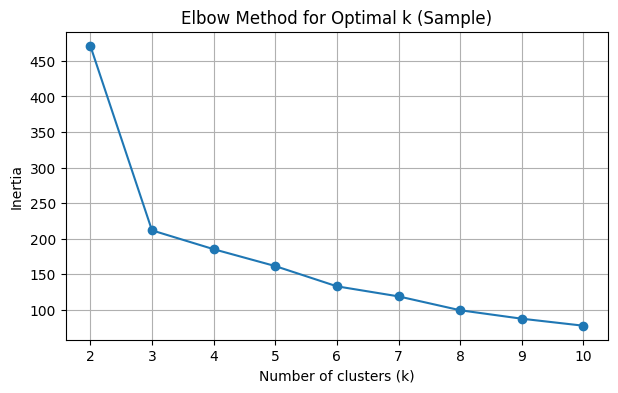

In [78]:
intertia = []
K_range = range(2, 11)
for k in K_range:
    labels, centroids = kmeans(X, k, random_state=183)
    cluster_type = np.unique(labels) 
    cluster = []
    for type in cluster_type:
        cluster.append(X[labels == type])
    wcss = 0
    for i in range(centroids.shape[0]):
        wcss += np.sum((cluster[i]-centroids[i])**2)
    intertia.append(wcss)

plt.figure(figsize=(7,4))
plt.plot(K_range, intertia, marker='o')
plt.title('Elbow Method for Optimal k (Sample)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

